In [ ]:
# Importing Libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import sqlalchemy

In [ ]:
#Using data from AWS RDS
username = "postgres"
password = "postgres"
endpoint = "crypto-warehouse.cdvabacdldda.us-west-1.rds.amazonaws.com" 
dbname   = "BitcoinDataMart"

con = sqlalchemy.create_engine("postgresql://%s:%s@%s/%s" % (username, password, endpoint, dbname))

df = pd.read_sql("SELECT * FROM bitcoin_datamart_data", con)
#print(pd.__version__)
df.head()

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


,column1,unix,Open,high,low,Close,volume-coin,volume-usd,weighted_price,date,just_date,just_time
0,0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00,2011-12-31,07:52:00
1,1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00,2011-12-31,07:53:00
2,2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00,2011-12-31,07:54:00
3,3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00,2011-12-31,07:55:00
4,4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00,2011-12-31,07:56:00


In [ ]:
# Changing date time values
df['weighted_price'] = df['weighted_price'].astype(float)

df['date'] = pd.to_datetime(df['unix'],unit='s').dt.date

# Getting a sample of dates
f = pd.Timestamp(2014, 12, 1)
t = pd.Timestamp(2017, 10,20)
df = df[ df['date'] <= t]
df = df[ df['date'] >= f ]

group = df.groupby('date')

Real_Price = group['weighted_price'].mean()
df['my_weighted_avg'] = df[['high','low','Close']].mean(axis=1)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,column1,unix,Open,high,low,Close,volume-coin,volume-usd,weighted_price,date,just_date,just_time,my_weighted_avg
1250400,1542193,1417849500,372.15,372.15,372.07,372.07,3.645065,1356.2207,372.07034,2014-12-06,2014-12-06,07:05:00,372.096667
1250401,1542194,1417849560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-06,2014-12-06,07:06:00,NaN
1250402,1542195,1417849620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-06,2014-12-06,07:07:00,NaN
1250403,1542196,1417849680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-06,2014-12-06,07:08:00,NaN
1250404,1542197,1417849740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-06,2014-12-06,07:09:00,NaN


In [ ]:
# split data for train and test
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]


1052


In [ ]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling  RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
205/205 [==============================] - 3s 3ms/step - loss: 0.3624
Epoch 2/100
205/205 [==============================] - 1s 4ms/step - loss: 0.0929
Epoch 3/100
205/205 [==============================] - 1s 3ms/step - loss: 0.0418
Epoch 4/100
205/205 [==============================] - 1s 4ms/step - loss: 0.0355
Epoch 5/100
205/205 [==============================] - 1s 3ms/step - loss: 0.0337
Epoch 6/100
205/205 [==============================] - 1s 4ms/step - loss: 0.0321
Epoch 7/100
205/205 [==============================] - 1s 4ms/step - loss: 0.0304
Epoch 8/100
205/205 [==============================] - 1s 5ms/step - loss: 0.0285
Epoch 9/100
205/205 [==============================] - 1s 5ms/step - loss: 0.0265
Epoch 10/100
205/205 [==============================] - 1s 4ms/step - loss: 0.0244
Epoch 11/100
205/205 [==============================] - 1s 4ms/step - loss: 0.0222
Epoch 12/100
205/205 [==============================] - 1s 4ms/step - loss: 0.0200
Epoch 13/100


In [ ]:
# Making predictions for BTC
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)



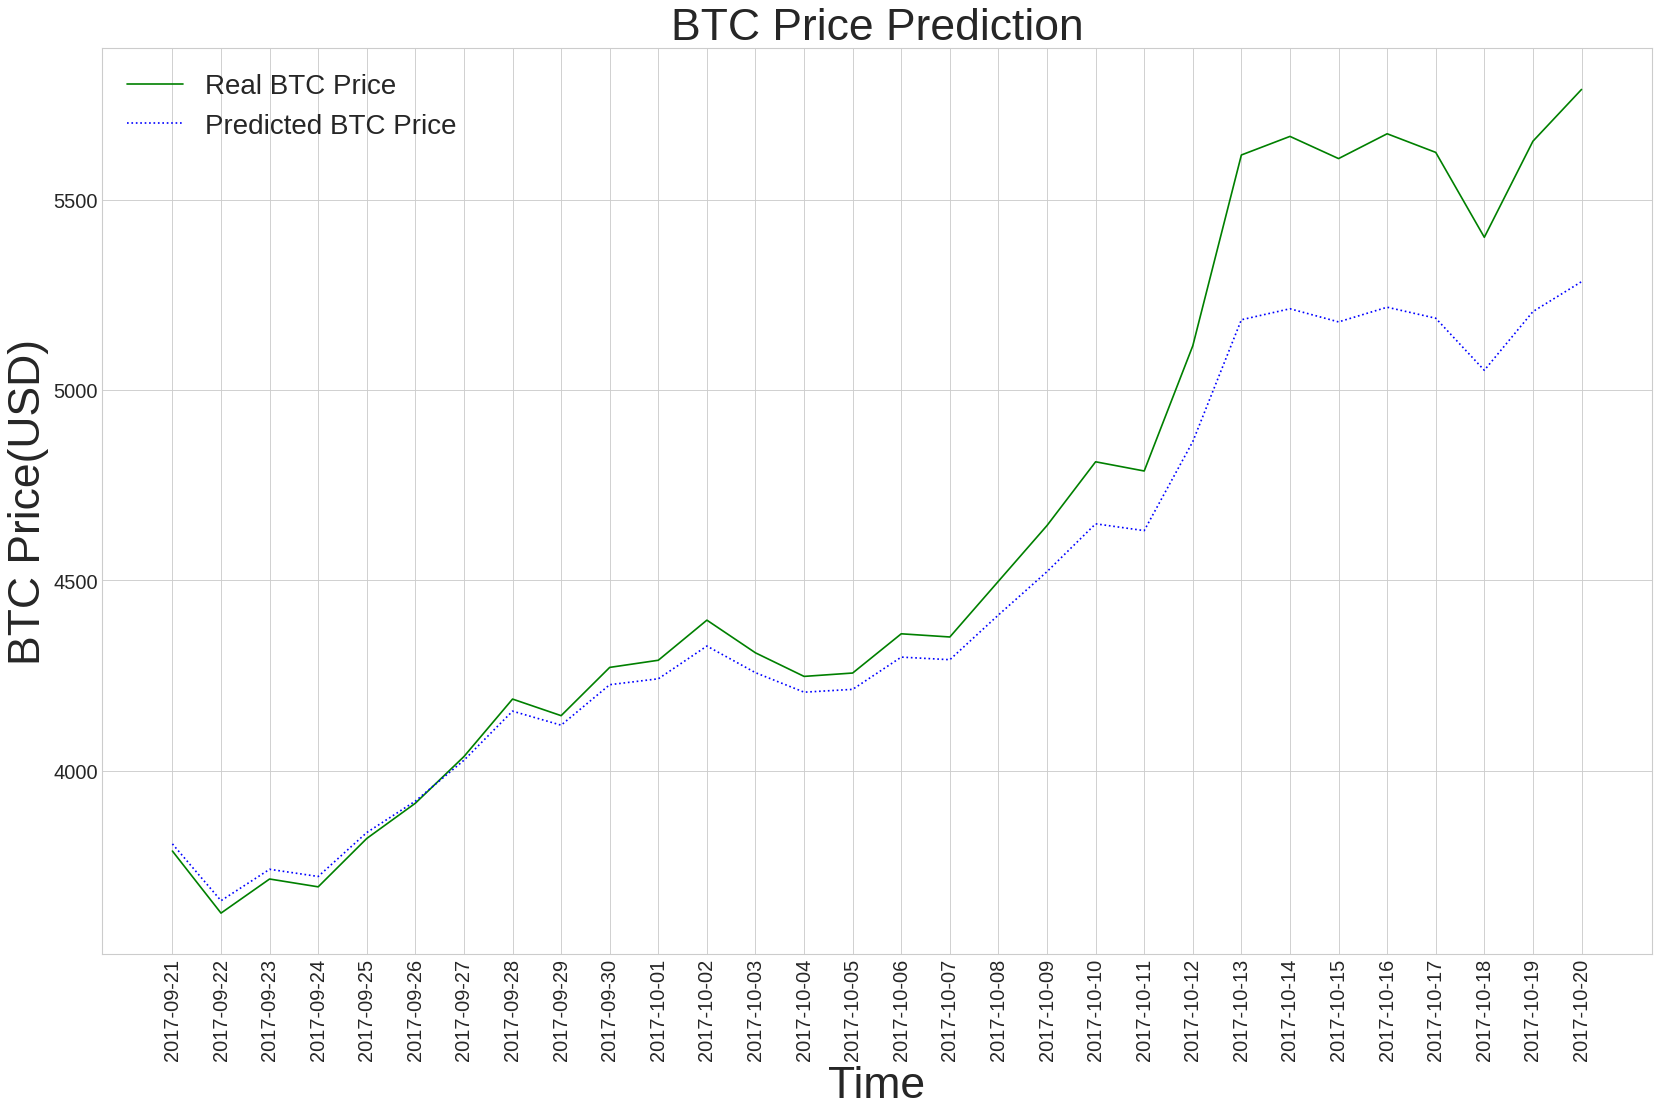

In [ ]:

# Visualising the results
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set,'-g', label = 'Real BTC Price')
plt.plot(predicted_BTC_price,':b', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

